In [1]:
%matplotlib notebook
from QDP import qdp
import os.path
import numpy as np
from scipy.stats import poisson
import h5py
import matplotlib.pyplot as plt
from scipy.optimize import leastsq,curve_fit

In [2]:
def sin(t,amp,freq,phase,offset):
    res = (amp*np.sin((2*np.pi*freq*t)+phase)) + offset
    return res 

def decaying_sin(t,tau,amp,freq,phase,offset):
    res = (amp*np.exp(-t/tau)*np.sin((2*np.pi*freq*t)+phase)) + offset
    return res 

def est_freq(ydata,tgap,tau,amp,freq,phase,offset): # Estimation of frequency change (from dy/df where y=sinusoidal fit)
    res=(ydata-decaying_sin(tau,tgap,amp,freq,phase,offset))/(amp*np.exp(-tgap/tau)*2*np.pi*tgap*np.cos(2*np.pi*freq*tgap+phase))
    return res

def gaussian(x,amp,x0,sigma,offset):
    res=(amp*np.exp((-(x-x0)**2)/(sigma**2)))+offset
    return res


# Microwave RFE


In [3]:
#analysis_master_path='Y:/Rb/Analysis/' # Y:\ is network drive connected to Hexagon E:\Rb\
exp_id='2018_03_02_10_58_13_Microwave RFE'
data_master_path='D:/Data/' # D:\ is local SSD in the main experiment computer
exp_date="_".join(exp_id.split("_")[:3]) # Date folder name automatically generated from exp name.
exp_path=data_master_path+exp_date+'/'+exp_id+'/'
experiment_file='results.hdf5'
dp=exp_path
cuts = [[450],[450],[450]]

q = qdp.QDP(base_data_path=dp)
q.load_data_file(experiment_file)
for r in range(5):
    q.set_thresholds(cuts, roi=r)
q.experiments[0]['variable_list']
xlab = q.experiments[0]['variable_desc'][q.experiments[0]['variable_list'][0]]['description']
q.get_thresholds()
retention = q.apply_thresholds()

<IPython.core.display.Javascript object>


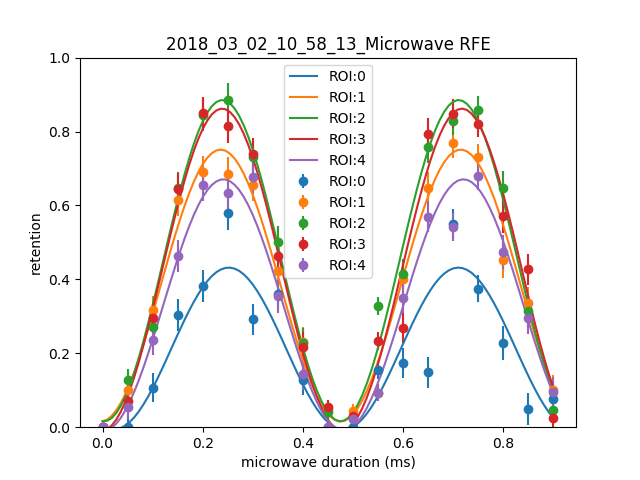

ROI:0, tau : -3524485.56397, amplitude 0.219033934609 , freq:2.1819543801, phase:-1.88216739381, offset:0.212790113708
ROI:1, tau : 1162555.92034, amplitude 0.367897692628 , freq:2.08674081899, phase:-1.5201471056, offset:0.383220273405
ROI:2, tau : 10291583.4207, amplitude 0.434675676178 , freq:2.11963901864, phase:-1.61279512698, offset:0.450626817944
ROI:3, tau : 5435082.92513, amplitude 0.435415227859 , freq:2.08922844625, phase:-1.56195960823, offset:0.426608282109
ROI:4, tau : -25931808.0512, amplitude 0.340361699493 , freq:2.0861210278, phase:-1.5884909937, offset:0.330352642129


In [4]:
colors=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728','#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']
fig, ax = plt.subplots()
fit_guesses=[30,0.4,2,0,0.5]
roi_dependency=[0,0,0,0,0]
fitted_parameters=[]
for roi in [0,1,2,3,4]:
    error=0
    data = []
    reten = []
    err = []
    for e in range(len(np.squeeze(retention['ivar']))):
        data.append(np.squeeze(retention['ivar'])[e][roi])
        reten.append(np.squeeze(retention['retention'])[e][roi])
        err.append(np.squeeze(retention['error'])[e][roi])
    ax.errorbar(data,reten,yerr=err,label="ROI:{}".format(roi),fmt='o',color=colors[roi])
    guesses=np.add(fit_guesses,np.ones(len(fit_guesses))*(roi-2)*roi_dependency)
    try:
        fit,pcov = curve_fit(decaying_sin,data,reten,guesses)
    except RuntimeError:
        error=1
    if error is not 1:
        print "ROI:{}, tau : {}, amplitude {} , freq:{}, phase:{}, offset:{}".format(roi,fit[0],fit[1],fit[2],fit[3],fit[4])
        fitted_parameters.append(fit[0])
        xarray=np.linspace(np.min(data),np.max(data),100)
        yfit=decaying_sin(xarray, fit[0],fit[1],fit[2],fit[3],fit[4])
        plt.plot(xarray,yfit,label="ROI:{}".format(roi),color=colors[roi])

plt.show()
ax.set_title(exp_id)
ax.set_ylim(0, 1)
ax.set_xlabel(xlab)
ax.set_ylabel('retention')
ax.legend()

In [7]:
avgfreq=(2.012+2.08)/2
1/avgfreq/2

0.24437927663734113

# Full Ramsey

In [5]:
#analysis_master_path='Y:/Rb/Analysis/' # Y:\ is network drive connected to Hexagon E:\Rb\
exp_id='2018_03_04_21_06_49_Full Ramsey, open loop, r1-r2'
data_master_path='D:/Data/' # D:\ is local SSD in the main experiment computer
exp_date="_".join(exp_id.split("_")[:3]) # Date folder name automatically generated from exp name.
exp_path=data_master_path+exp_date+'/'+exp_id+'/'
experiment_file='results.hdf5'
dp=exp_path
cuts = [[450],[450],[450]]

q = qdp.QDP(base_data_path=dp)
q.load_data_file(experiment_file)
for r in range(5):
    q.set_thresholds(cuts, roi=r)
q.experiments[0]['variable_list']
xlab = q.experiments[0]['variable_desc'][q.experiments[0]['variable_list'][0]]['description']
q.get_thresholds()
retention = q.apply_thresholds()

QDP\qdp.py:85: RuntimeWarning: invalid value encountered in sqrt
  errs[r] = (z/n[r].astype('float'))*np.sqrt(ns[r].astype('float')*(1.0-ns[r].astype('float')/n[r].astype('float')))


<IPython.core.display.Javascript object>


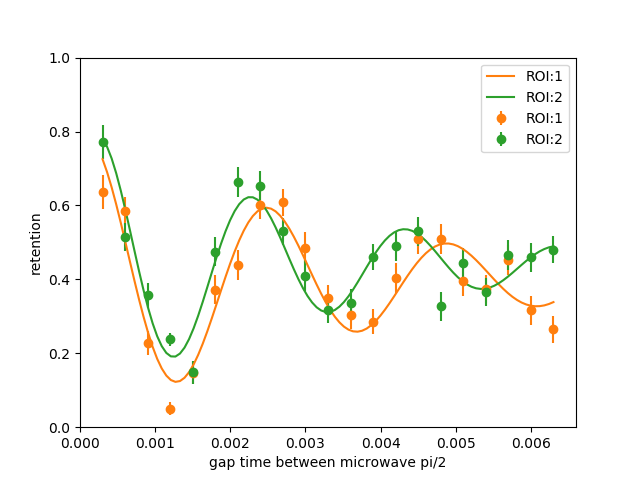

ROI:1, tau : 0.00352895086718, amplitude 0.398134603525 , freq:416.979679883, phase:1.24780335609, offset:0.397875932575
ROI:2, tau : 0.00312540324411, amplitude 0.376312725554 , freq:487.664073026, phase:0.801083945434, offset:0.441793987623


In [6]:
colors=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728','#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']
fig, ax = plt.subplots()
fit_guesses=[0.005,0.35,400,0,0.3]
roi_dependency=[0,0,0,0,0]
fitted_parameters=[]
for roi in [1,2]:
    error=0
    data = []
    reten = []
    err = []
    for e in range(len(np.squeeze(retention['ivar']))):
        data.append(np.squeeze(retention['ivar'])[e][roi])
        reten.append(np.squeeze(retention['retention'])[e][roi])
        err.append(np.squeeze(retention['error'])[e][roi])
    ax.errorbar(data,reten,yerr=err,label="ROI:{}".format(roi),fmt='o',color=colors[roi])
    guesses=np.add(fit_guesses,np.ones(len(fit_guesses))*(roi-2)*roi_dependency)
    try:
        fit,pcov = curve_fit(decaying_sin,data,reten,guesses)
    except RuntimeError:
        error=1
    if error is not 1:
        print "ROI:{}, tau : {}, amplitude {} , freq:{}, phase:{}, offset:{}".format(roi,fit[0],fit[1],fit[2],fit[3],fit[4])
        fitted_parameters.append(fit)
        xarray=np.linspace(np.min(data),np.max(data),100)
        yfit=decaying_sin(xarray, fit[0],fit[1],fit[2],fit[3],fit[4])
        plt.plot(xarray,yfit,label="ROI:{}".format(roi),color=colors[roi])

plt.show()
ax.set_ylim(0, 1)
ax.set_xlabel(xlab)
ax.set_ylabel('retention')
ax.legend()

In [7]:
fitted_parameters

[array([  3.52895087e-03,   3.98134604e-01,   4.16979680e+02,
          1.24780336e+00,   3.97875933e-01]),
 array([  3.12540324e-03,   3.76312726e-01,   4.87664073e+02,
          8.01083945e-01,   4.41793988e-01])]

# Open loop, fixed gap time
2018_02_23_11_29_39_Open loop Microwave Ramsey, Fixed gap time, 780A as stark shift beam, parked at r1-r2

In [5]:
exp_id='2018_02_23_11_29_39_Open loop Microwave Ramsey, Fixed gap time, 780A as stark shift beam, parked at r1-r2'
data_master_path='D:/Data/' # D:\ is local SSD in the main experiment computer
exp_date="_".join(exp_id.split("_")[:3]) # Date folder name automatically generated from exp name.
exp_path=data_master_path+exp_date+'/'+exp_id+'/'
experiment_file='results.hdf5'
dp=exp_path
cuts = [[450],[450],[450]]

q = qdp.QDP(base_data_path=dp)
q.load_data_file(experiment_file)
for r in range(5):
    q.set_thresholds(cuts, roi=r)
print q.experiments[0]['variable_list']
q.get_thresholds()
retention = q.apply_thresholds()


[u'zz_outermost_iteration']


In [ ]:
make_plots(q,retention)

# other experiments

[u'zz_outermost_iteration']


<IPython.core.display.Javascript object>


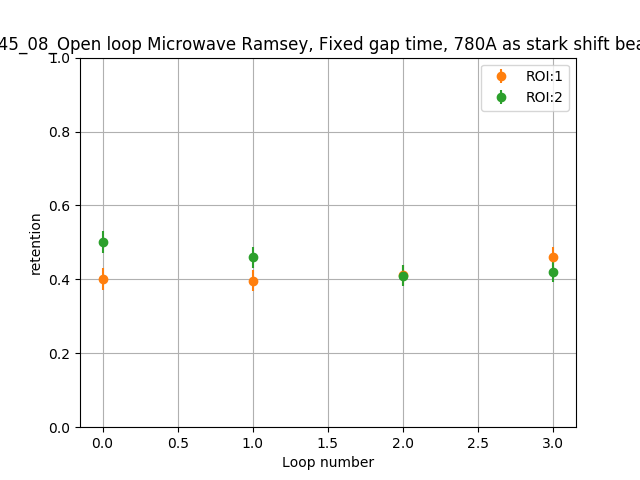

<IPython.core.display.Javascript object>


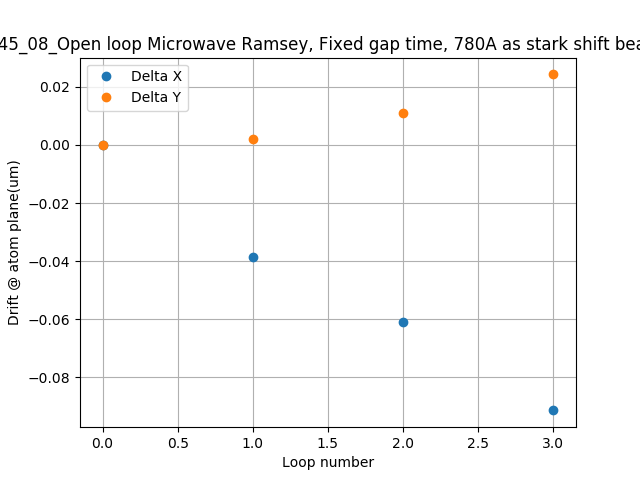

<IPython.core.display.Javascript object>


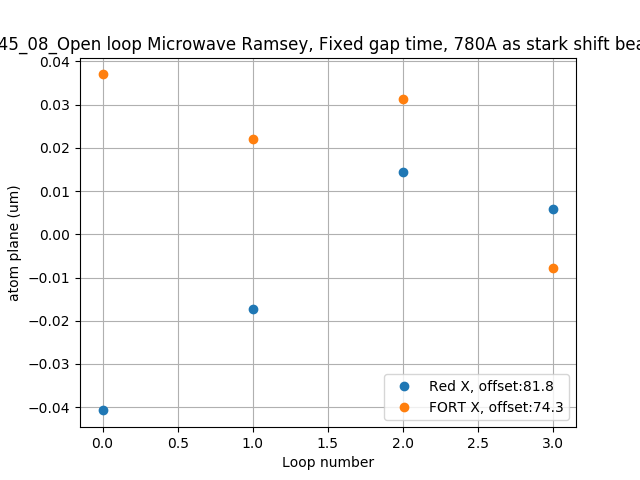

<IPython.core.display.Javascript object>


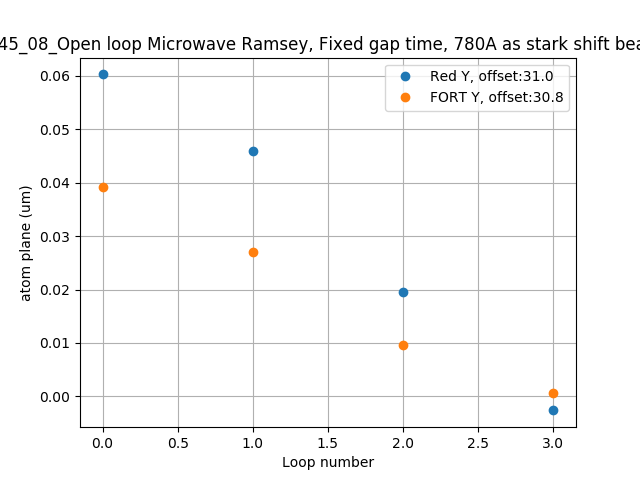

In [9]:
exp_id='2018_02_23_12_45_08_Open loop Microwave Ramsey, Fixed gap time, 780A as stark shift beam, parked at r1-r2'
data_master_path='D:/Data/' # D:\ is local SSD in the main experiment computer
exp_date="_".join(exp_id.split("_")[:3]) # Date folder name automatically generated from exp name.
exp_path=data_master_path+exp_date+'/'+exp_id+'/'
experiment_file='results.hdf5'
dp=exp_path
cuts = [[450],[450],[450]]

q = qdp.QDP(base_data_path=dp)
q.load_data_file(experiment_file)
for r in range(5):
    q.set_thresholds(cuts, roi=r)
print q.experiments[0]['variable_list']
q.get_thresholds()
retention = q.apply_thresholds()
make_plots(q,retention)

[u'zz_outermost_iteration']


<IPython.core.display.Javascript object>


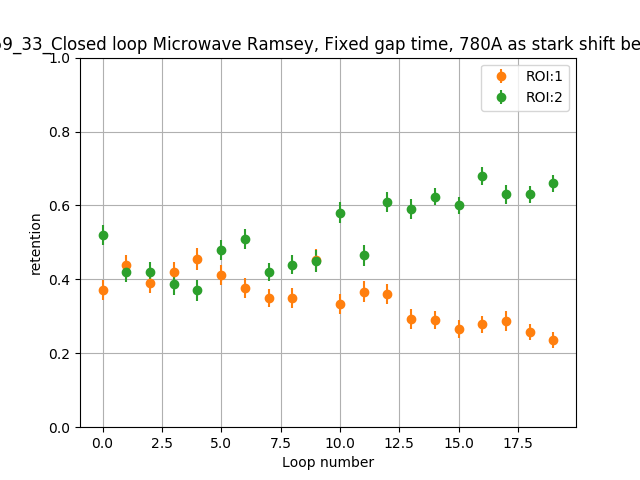

<IPython.core.display.Javascript object>


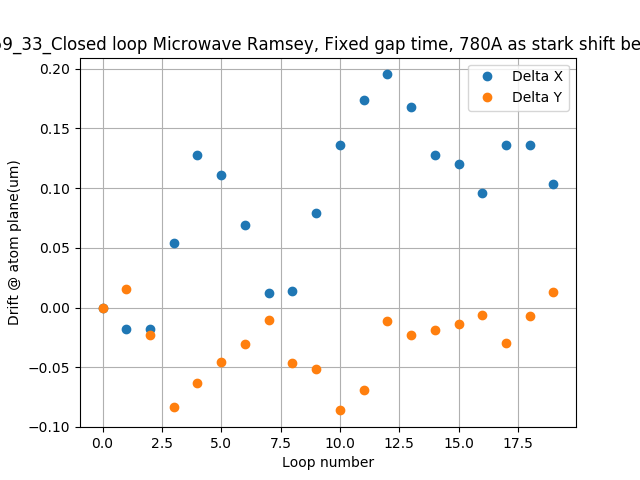

<IPython.core.display.Javascript object>


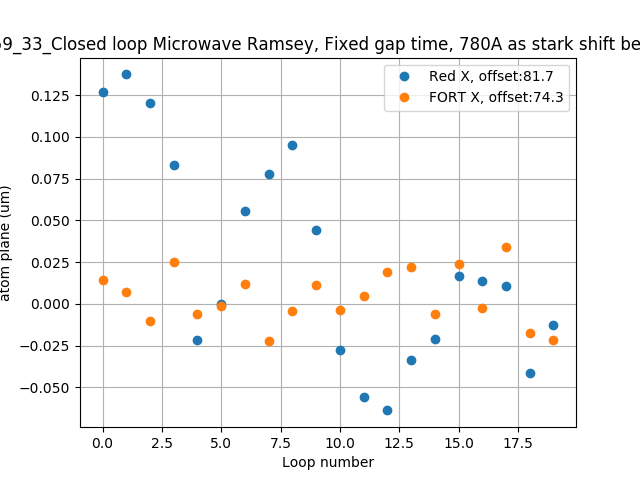

<IPython.core.display.Javascript object>


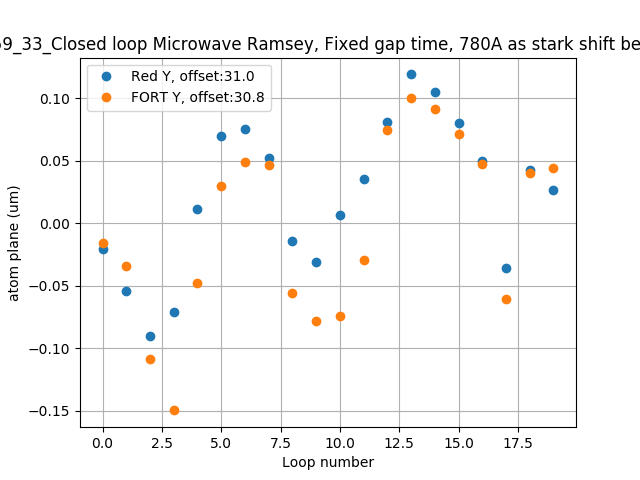

In [10]:
exp_id='2018_02_23_12_59_33_Closed loop Microwave Ramsey, Fixed gap time, 780A as stark shift beam, parked at r1-r2'
data_master_path='D:/Data/' # D:\ is local SSD in the main experiment computer
exp_date="_".join(exp_id.split("_")[:3]) # Date folder name automatically generated from exp name.
exp_path=data_master_path+exp_date+'/'+exp_id+'/'
experiment_file='results.hdf5'
dp=exp_path
cuts = [[450],[450],[450]]

q = qdp.QDP(base_data_path=dp)
q.load_data_file(experiment_file)
for r in range(5):
    q.set_thresholds(cuts, roi=r)
print q.experiments[0]['variable_list']
q.get_thresholds()
retention = q.apply_thresholds()
make_plots(q,retention)

[u'zz_outermost_iteration']


<IPython.core.display.Javascript object>


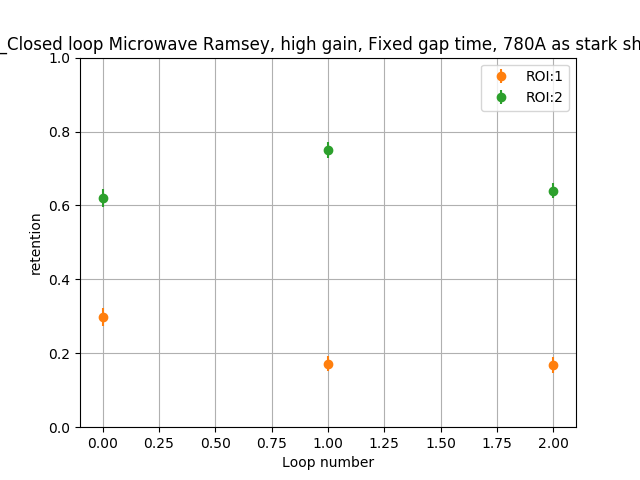

<IPython.core.display.Javascript object>


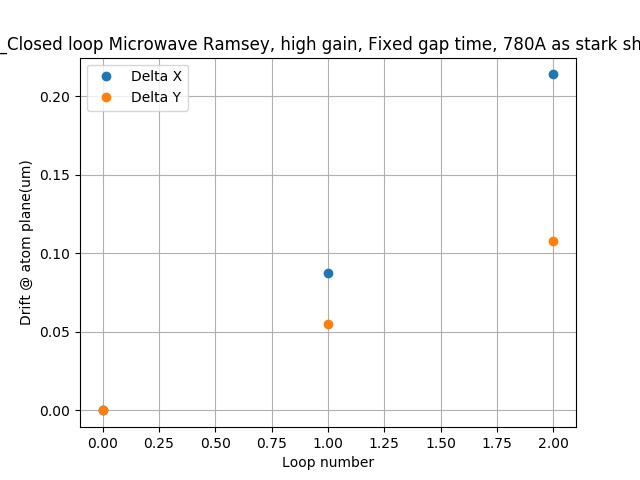

<IPython.core.display.Javascript object>


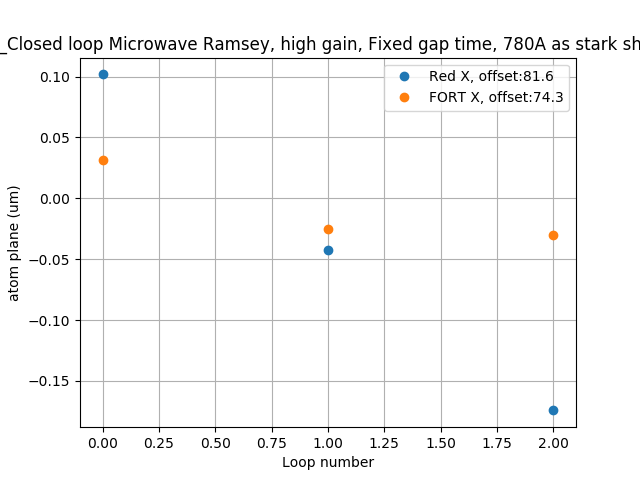

<IPython.core.display.Javascript object>


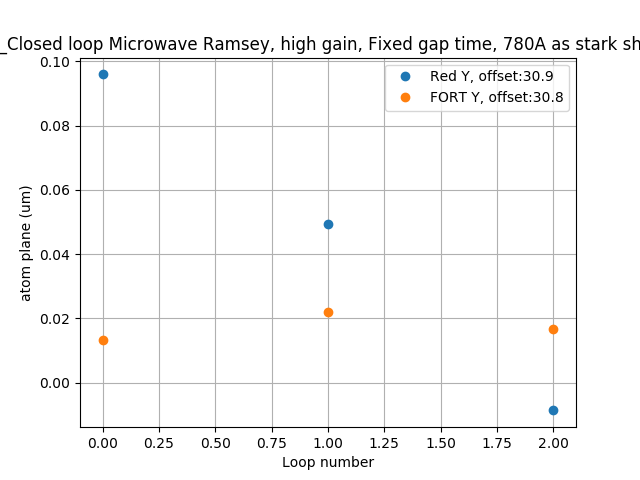

In [11]:
exp_id='2018_02_23_14_21_09_Closed loop Microwave Ramsey, high gain, Fixed gap time, 780A as stark shift beam, parked at r1-r2'
data_master_path='D:/Data/' # D:\ is local SSD in the main experiment computer
exp_date="_".join(exp_id.split("_")[:3]) # Date folder name automatically generated from exp name.
exp_path=data_master_path+exp_date+'/'+exp_id+'/'
experiment_file='results.hdf5'
dp=exp_path
cuts = [[450],[450],[450]]

q = qdp.QDP(base_data_path=dp)
q.load_data_file(experiment_file)
for r in range(5):
    q.set_thresholds(cuts, roi=r)
print q.experiments[0]['variable_list']
q.get_thresholds()
retention = q.apply_thresholds()
make_plots(q,retention)